In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

print("the shape is " ,x_train[0].shape)

print(x_train[0].shape)


the shape is  (28, 28)
(28, 28)


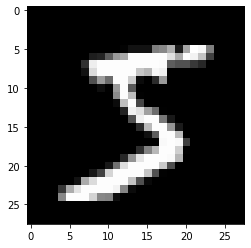

In [ ]:

import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap="gray")
plt.show()


In [ ]:

print(y_train[0])    


5


In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


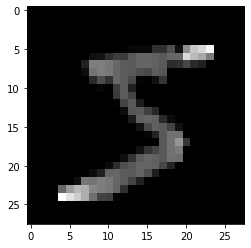

In [ ]:

plt.imshow(x_train[0],cmap="gray")
plt.show()


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0096 - accuracy: 0.9970
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0112 - accuracy: 0.9963
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0086 - accuracy: 0.9971


In [ ]:

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.1448 - accuracy: 0.9744
0.14478527009487152
0.974399983882904


(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


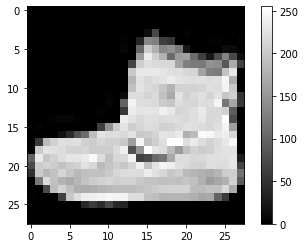

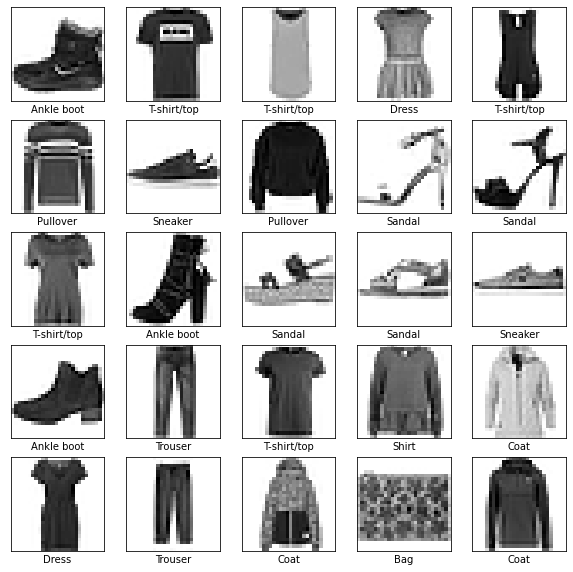

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5006 - accuracy: 0.8255
Epoch 2/2
313/313 [==============================] - 1s 1ms/step - loss: 0.3913 - accuracy: 0.8610
Test accuracy: 0.8610000014305115
[6.7875204e-05 1.6024417e-06 8.5750889e-06 9.8331220e-06 7.8126004e-06
 5.5869304e-02 8.4303298e-05 1.0362966e-01 5.1534438e-04 8.3980566e-01]
9
9


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt




fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']    
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

plt.figure()
plt.imshow(train_images[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()


train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # diff between actual and probabilities
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=2) # less epochs means UF , more epochs means OF



test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])


In [ ]:

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  


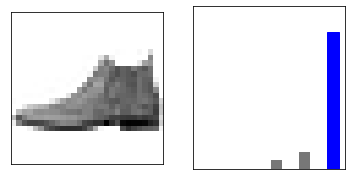

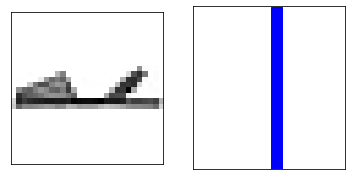

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

i = 111
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()



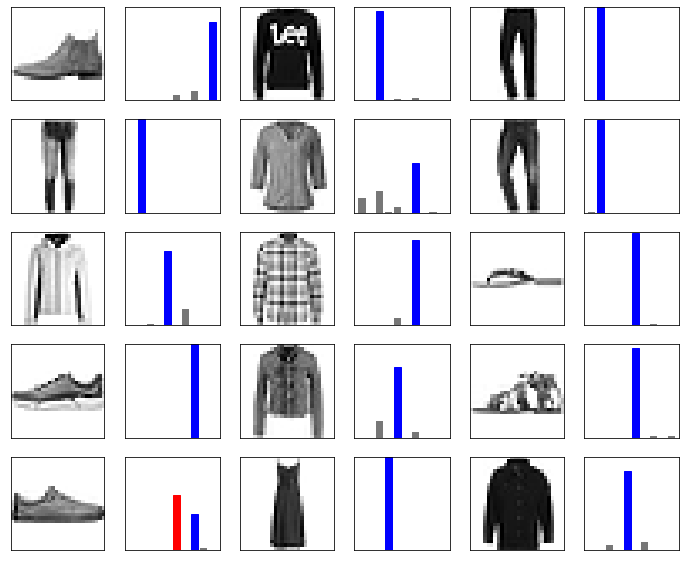

(28, 28)
(1, 28, 28)
[[6.7875153e-05 1.6024387e-06 8.5750808e-06 9.8331138e-06 7.8126013e-06
  5.5869263e-02 8.4303145e-05 1.0362962e-01 5.1534362e-04 8.3980572e-01]]


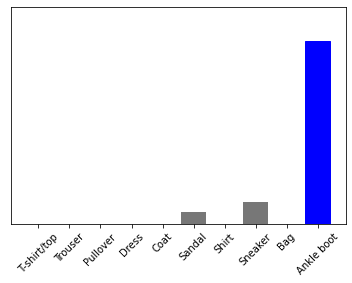

9


In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

# Grab an image from the test dataset
img = test_images[0]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

prediction_result = np.argmax(predictions_single[0])
print(prediction_result)
